## Isochrone Fitting - NGC 6341

In [108]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## This program uses data from Dartmouth Isochrone and LF generator ##
## to get the SDSS ugriz colours and graphically fit ##
## isochrones to determine the age and metallicity of NGC 6341 ##

Source of data:

**[1]** Dartmouth Isochrone and LF Generator :
http://stellar.dartmouth.edu/models/isolf_new.html

Used were SDSS ugriz colours

In [74]:
## use two sets
## first with metallicity set to 0.1
## ages ranging from 9 Gyr, 10.1, 11, 12.9
## then with varying metallicities age 12.9 Gyr

ages = ['age9.csv','age101.csv',"age11.csv","age115.csv",'age129.csv']
met = ["meta-2.csv","meta-1.csv","meta0.csv","meta05.csv"]
AGES=[]
FE = []
for f in ages:
    AGES.append(pd.read_csv(f,delim_whitespace=True,nrows=267, skiprows=8))
for i in met:
    FE.append(pd.read_csv(i,delim_whitespace=True,nrows=267, skiprows=8))

In [75]:
FE[3]

,#EEP,M/Mo,LogTeff,LogG,LogL/Lo,sdss_u,sdss_g,sdss_r,sdss_i,sdss_z
0,13,0.106914,3.4873,5.2152,-2.8456,18.2260,15.2382,13.7364,12.3287,11.4763
1,14,0.127925,3.4879,5.1503,-2.7004,17.7980,14.8573,13.3643,11.9640,11.1149
2,15,0.148418,3.4890,5.0981,-2.5796,17.4300,14.5309,13.0471,11.6566,10.8126
3,16,0.165867,3.4909,5.0629,-2.4885,17.1289,14.2656,12.7922,11.4167,10.5820
4,17,0.180875,3.4932,5.0383,-2.4167,16.8766,14.0441,12.5814,11.2225,10.3987
...,...,...,...,...,...,...,...,...,...,...
262,275,1.013572,3.4621,-0.0840,3.3298,5.0465,3.2888,1.3383,-0.8003,-2.4603
263,276,1.013575,3.4592,-0.1155,3.3496,5.1398,3.3251,1.3430,-0.8095,-2.4832
264,277,1.013577,3.4563,-0.1461,3.3688,5.0741,3.2900,1.2964,-0.8495,-2.5224
265,278,1.013579,3.4536,-0.1756,3.3871,4.8117,3.1674,1.1869,-0.9265,-2.5813


In [76]:
## 9.0 Gyr, [Fe/H]=0.1, g - r vs g ##
g9 = AGES[0]['sdss_g'].values
r9 = AGES[0]['sdss_r'].values

## 10.1 Gyr, [Fe/H]=0.1, g - r vs g ##
g101 = AGES[1]['sdss_g'].values
r101 = AGES[1]['sdss_r'].values

## 11.0 Gyr, [Fe/H]=0.1, g - r vs g ##
g11 = AGES[2]['sdss_g'].values
r11 = AGES[2]['sdss_r'].values

## 11.5 Gyr, [Fe/H]=0.1, g - r vs g ##
g115 = AGES[3]['sdss_g'].values
r115 = AGES[3]['sdss_r'].values

## 12.9 Gyr, [Fe/H]=0.1, g - r vs g ##
g129=AGES[4]['sdss_g'].values
r129=AGES[4]['sdss_r'].values

In [79]:
## [Fe/H] = -2, age = 12.9 Gyr, g - r vs g ##

gm2 = FE[0]['sdss_g'].values
rm2 = FE[0]['sdss_r'].values

## [Fe/H] = -1, age = 12.9 Gyr, g - r vs g ##
gm1 = FE[1]['sdss_g'].values
rm1 = FE[1]['sdss_r'].values

## [Fe/H] = 0, age = 12.9 Gyr, g - r vs g ##
g0 = FE[2]['sdss_g'].values
r0 = FE[2]['sdss_r'].values

## [Fe/H] = 0.5, age = 12.9 Gyr, g - r vs g ##
g05 = FE[3]['sdss_g'].values
r05 = FE[3]['sdss_r'].values

## Isochrones for constant metallicity, differing ages

Text(0.5, 1.0, 'Dartmouth Isochrones for [Fe/H]=0.1')

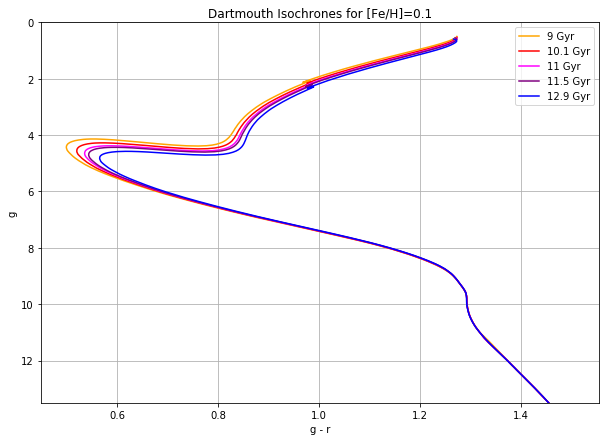

In [78]:
plt.figure(figsize=(10,7))

plt.ylim(13.5,0)

#plt.plot(g11[0:237]-r11[0:237],g11[0:237])

plt.plot(g9[0:237]-r9[0:237],g9[0:237], color='orange')
#plt.plot(g9-r9,g9, color='orange')
plt.plot(g101[0:237]-r101[0:237],g101[0:237], color='red')
plt.plot(g11[0:237]-r11[0:237],g11[0:237],color='magenta')
plt.plot(g115[0:237]-r115[0:237],g115[0:237],color='purple')
plt.plot(g129[0:237]-r129[0:237],g129[0:237],color='blue')

plt.legend(['9 Gyr','10.1 Gyr','11 Gyr','11.5 Gyr','12.9 Gyr'])
plt.xlabel('g - r')
plt.ylabel('g')
plt.grid(True)
plt.title('Dartmouth Isochrones for [Fe/H]=0.1')
## see table for making Av correction 

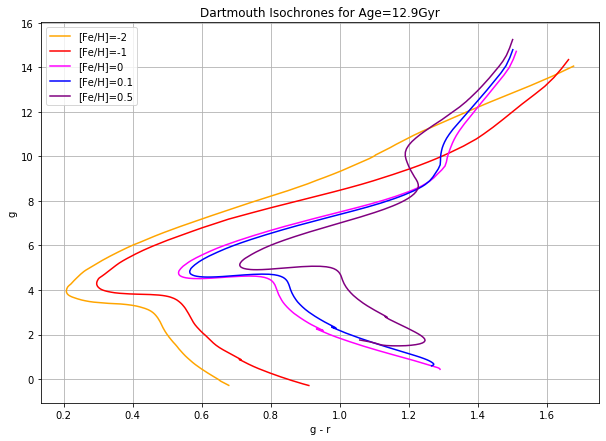

In [80]:
plt.figure(figsize=(10,7))

plt.plot(gm2[0:237]-rm2[0:237],gm2[0:237], color='orange')
plt.plot(gm1[0:237]-rm1[0:237],gm1[0:237], color='red')
plt.plot(g0[0:237]-r0[0:237],g0[0:237],color='magenta')
plt.plot(g129[0:237]-r129[0:237],g129[0:237],color='blue')
plt.plot(g05[0:237]-r05[0:237],g05[0:237],color='purple')

plt.title('Dartmouth Isochrones for Age=12.9Gyr')
plt.xlabel('g - r')
plt.ylabel('g')
plt.grid(True)
plt.legend(['[Fe/H]=-2','[Fe/H]=-1','[Fe/H]=0','[Fe/H]=0.1','[Fe/H]=0.5'])
#plt.plot(gm2[0:237]-rm2[0:237],gm2[0:237], color='orange')

Text(0.5, 1.0, 'NGC 6341 - CMD (g vs g-i)')

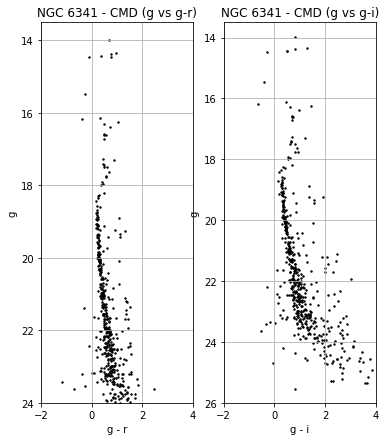

In [85]:
## NGC 6341 900 entries for 12' on sky

datafile = 'NGC6341.csv' # NGC 6341
df = pd.read_csv(datafile)

ra = df['ra']
dec = df['dec']

gmag = df['g']
rmag = df['r']
imag = df['i']

fig, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(6,7))

ax1.scatter(gmag-rmag, gmag, s=2, color = 'k')
ax2.scatter(gmag-imag, gmag, s=2, color = 'k')
ax1.set_xlabel('g - r')
ax1.set_ylabel('g')
ax1.set_xlim(-2,4)
ax1.set_title('NGC 6341 - CMD (g vs g-r)')
ax1.grid(True)
ax1.set_ylim(24,13.5)

ax2.set_xlim(-2,4)
ax2.set_ylim(26,13.5)
ax2.grid(True)
ax2.set_xlabel('g - i')
ax2.set_ylabel('g')
ax2.set_title('NGC 6341 - CMD (g vs g-i)')
#plt.ylim(13.5,26.5)

##  Colour conversion (g-r) to (B-V)
Source for transformations between SDSS magnitudes and other systems:

http://www.sdss3.org/dr8/algorithms/sdssUBVRITransform.php

Jester et al. (2005)

In [87]:
B = gmag + 0.3130*(gmag - rmag) + 0.2271
V = gmag - 0.5784*(gmag - rmag) - 0.0038

#####
# Jordi et al.
## Population I stars:
Bg_I = 0.312*(gmag-rmag)+0.219
Vg_I = -0.573*(gmag-rmag)-0.016

# Population II stars:
Bg_II   = 0.349*(gmag-rmag)  + 0.245 
Vg_II  = -0.569*(gmag-rmag) + 0.021 

#####
BV = 0.98*(gmag-rmag)+0.22
bg = 0.313*(gmag-rmag)+0.219
vg = -0.565*(gmag-rmag)-0.0169

######
Bo = g129[0:237] + 0.3130*(g129[0:237] - r129[0:237]) + 0.2271
Vo = g129[0:237] - 0.5784*(g129[0:237] - r129[0:237]) - 0.0038


In [93]:
## Jester et al.
## for all stars Rc-Ic < 1.5

Rc_Ic = (rmag-imag)+0.21
BV,V=np.array([]),np.array([])
for item in Rc_Ic:
    if item<1.5:
        BV=0.98*(gmag-rmag)
        V = gmag- 0.59*(gmag-rmag)

##### ISOCHRONES #####

## AGE 9 GYR ##
BVo_9 = 0.98*(g9[0:237]-r9[0:237])
Vo_9 = g9[0:237]- 0.59*(g9[0:237]-r9[0:237])

## AGE 10.1 GYR ##
BVo_101 = 0.98*(g101[0:237]-r101[0:237])
Vo_101 = g101[0:237]- 0.59*(g101[0:237]-r101[0:237])

## AGE 11 GYR ##
BVo_11 = 0.98*(g11[0:237]-r11[0:237])
Vo_11 = g11[0:237]- 0.59*(g11[0:237]-r11[0:237])

## AGE 11.5 GYR ##
BVo_115 = 0.98*(g115[0:237]-r115[0:237])
Vo_115 = g115[0:237]- 0.59*(g115[0:237]-r115[0:237])

## AGE 12.9 GYR ##
BVo_129 = 0.98*(g129[0:237]-r129[0:237])
Vo_129 = g129[0:237]- 0.59*(g129[0:237]-r129[0:237])

In [95]:
##### ISOCHRONES #####

## Metallicity -2 ##
BVo_m2 = 0.98*(gm2[0:237]-rm2[0:237])
Vo_m2 = gm2[0:237]- 0.59*(gm2[0:237]-rm2[0:237])

## Metallicity -1 ##
BVo_m1 = 0.98*(gm1[0:237]-rm1[0:237])
Vo_m1 = gm1[0:237]- 0.59*(gm1[0:237]-rm1[0:237])

## Metallicity 0 ##
BVo_0 = 0.98*(g0[0:237]-r0[0:237])
Vo_0 = g0[0:237]- 0.59*(g0[0:237]-r0[0:237])

## Metallicity +0.5 ##
BVo_05 = 0.98*(g05[0:237]-r05[0:237])
Vo_05 = g05[0:237]- 0.59*(g05[0:237]-r05[0:237])

In [96]:
BVo_e = 0.98*(ge[0:237]-re[0:237])
Vo_e = ge[0:237]- 0.59*(ge[0:237]-re[0:237])

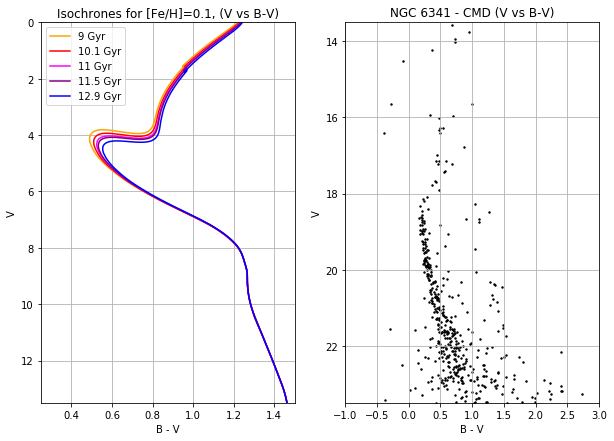

In [97]:
fig, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(10,7))

ax1.plot(BVo_9,Vo_9,color='orange')
ax1.plot(BVo_101,Vo_101,color='red')
ax1.plot(BVo_11,Vo_11,color='magenta')
ax1.plot(BVo_115,Vo_115,color='purple')
ax1.plot(BVo_129,Vo_129,color='blue')

ax1.set_xlim([0.25,1.5])
ax1.set_ylim([13.5,0])
ax1.set_xlabel('B - V')
ax1.set_ylabel('V')
ax1.set_title('Isochrones for [Fe/H]=0.1, (V vs B-V)')
ax1.grid(True)
ax1.legend(['9 Gyr','10.1 Gyr','11 Gyr','11.5 Gyr','12.9 Gyr'])

##### PLOTTING #####

ax2.scatter(BV,V,s=2,color='k')
ax2.set_xlim([-1,3])
ax2.set_ylim([23.5,13.5])
ax2.set_xlabel('B - V')
ax2.set_ylabel('V')
ax2.set_title('NGC 6341 - CMD (V vs B-V)')
ax2.grid(True)

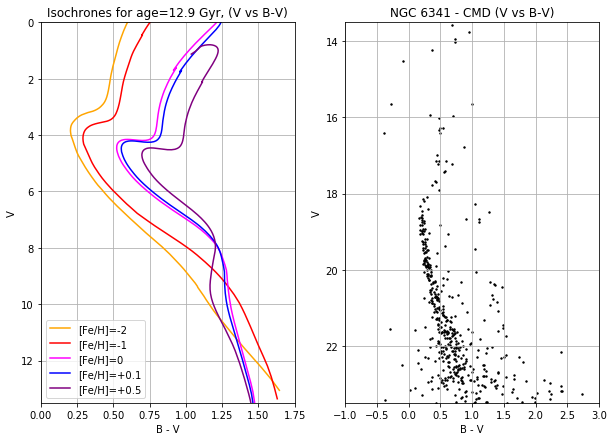

In [98]:
fig, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(10,7))

ax1.plot(BVo_m2,Vo_m2,color='orange')
ax1.plot(BVo_m1,Vo_m1,color='red')
ax1.plot(BVo_0 ,Vo_0,color='magenta')
ax1.plot(BVo_129,Vo_129,color='blue')
ax1.plot(BVo_05,Vo_05,color='purple')

ax1.set_xlim([0,1.75])
ax1.set_ylim([13.5,0])
ax1.set_xlabel('B - V')
ax1.set_ylabel('V')
ax1.set_title('Isochrones for age=12.9 Gyr, (V vs B-V)')
ax1.grid(True)
ax1.legend(['[Fe/H]=-2','[Fe/H]=-1','[Fe/H]=0','[Fe/H]=+0.1','[Fe/H]=+0.5'])

##### PLOTTING #####

ax2.scatter(BV,V,s=2,color='k')
ax2.set_xlim([-1,3])
ax2.set_ylim([23.5,13.5])
ax2.set_xlabel('B - V')
ax2.set_ylabel('V')
ax2.set_title('NGC 6341 - CMD (V vs B-V)')
ax2.grid(True)

## Fitting

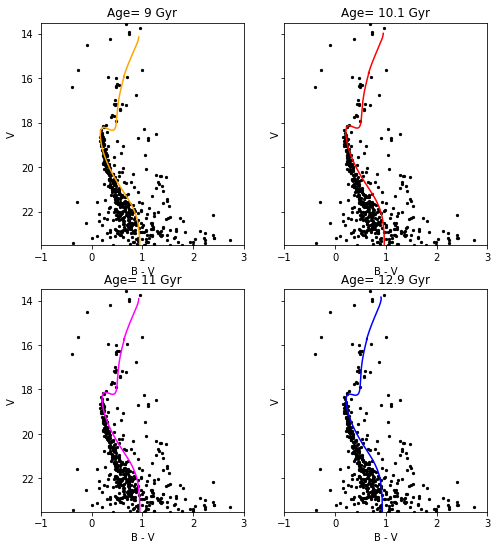

In [103]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True,figsize=(8,9))

ax1.plot(BVo_9-0.32,Vo_9+14.4,color='orange') 
ax1.set_xlim([-1, 3])
ax1.set_ylim([23.5,13.5])
ax1.set_xlabel('B - V')
ax1.set_ylabel('V')
ax1.set_title('Age= 9 Gyr')
ax1.scatter(BV,V,s=5,color='k')

ax2.plot(BVo_101-0.3,Vo_101+14.2,color='red')
ax2.set_xlim([-1, 3])
ax2.set_ylim([23.5,13.5])
ax2.set_xlabel('B - V')
ax2.set_ylabel('V')
ax2.set_title('Age= 10.1 Gyr')
ax2.scatter(BV,V,s=5,color='k')

ax3.plot(BVo_11-0.32,Vo_11+14.1,color='magenta')
ax3.set_xlim([-1, 3])
ax3.set_ylim([23.5,13.5])
ax3.set_xlabel('B - V')
ax3.set_ylabel('V')
ax3.set_title('Age= 11 Gyr')
ax3.scatter(BV,V,s=5,color='k')

ax4.plot(BVo_129-0.34,Vo_129+14,color='blue')
ax4.set_xlim([-1, 3])
ax4.set_ylim([23.5,13.5])
ax4.set_xlabel('B - V')
ax4.set_ylabel('V')
ax4.set_title('Age= 12.9 Gyr')
ax4.scatter(BV,V,s=5,color='k')

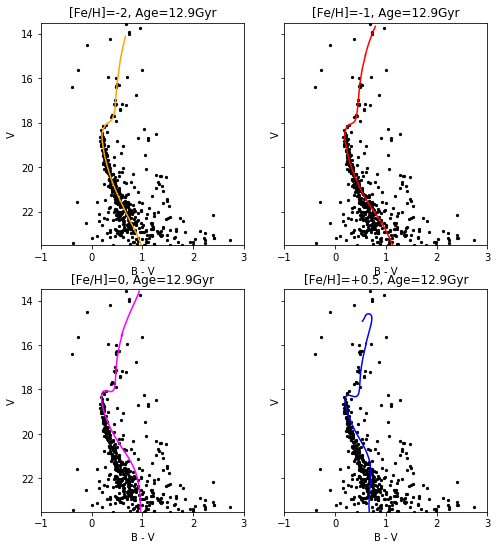

In [105]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True,figsize=(8,9))

ax1.plot(BVo_m2,Vo_m2+14.8,color='orange') 
ax1.set_xlim([-1, 3])
ax1.set_ylim([23.5,13.5])
ax1.set_xlabel('B - V')
ax1.set_ylabel('V')
ax1.set_title('[Fe/H]=-2, Age=12.9Gyr')
ax1.scatter(BV,V,s=5,color='k')

ax2.plot(BVo_m1-0.1,Vo_m1+14.5,color='red')
ax2.set_xlim([-1, 3])
ax2.set_ylim([23.5,13.5])
ax2.set_xlabel('B - V')
ax2.set_ylabel('V')
ax2.set_title('[Fe/H]=-1, Age=12.9Gyr')
ax2.scatter(BV,V,s=5,color='k')

ax3.plot(BVo_0-0.33,Vo_0+13.9,color='magenta')
ax3.set_xlim([-1, 3])
ax3.set_ylim([23.5,13.5])
ax3.set_xlabel('B - V')
ax3.set_ylabel('V')
ax3.set_title('[Fe/H]=0, Age=12.9Gyr')
ax3.scatter(BV,V,s=5,color='k')

ax4.plot(BVo_05-0.5,Vo_05+13.8,color='blue')
ax4.set_xlim([-1, 3])
ax4.set_ylim([23.5,13.5])
ax4.set_xlabel('B - V')
ax4.set_ylabel('V')
ax4.set_title('[Fe/H]=+0.5, Age=12.9Gyr')
ax4.scatter(BV,V,s=5,color='k')

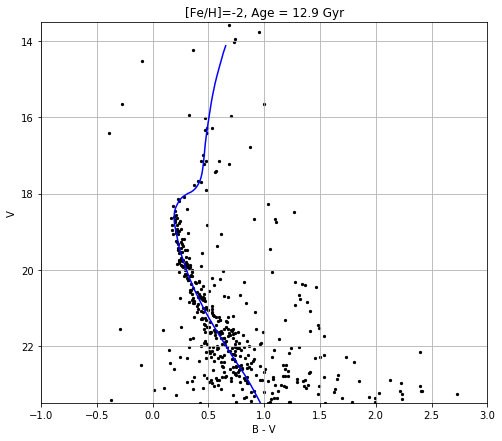

In [106]:
## metal poor, expected for old cluster
## test other ages at -2 metallicity

plt.figure(figsize=(8,7))

plt.xlim([-1, 3])
plt.ylim([23.5,13.5])
plt.xlabel('B - V')
plt.ylabel('V')

plt.plot(BVo_m2-0.01,Vo_m2+14.8,color='blue') 
plt.scatter(BV,V,s=5,color='k')
plt.title('[Fe/H]=-2, Age = 12.9 Gyr')
plt.grid(True)

## [Fe/H]=-2, Age=12.9 Gyr seems to be the best fit

Text(2.3, 14.7, 'Age = 12.9 Gyr')

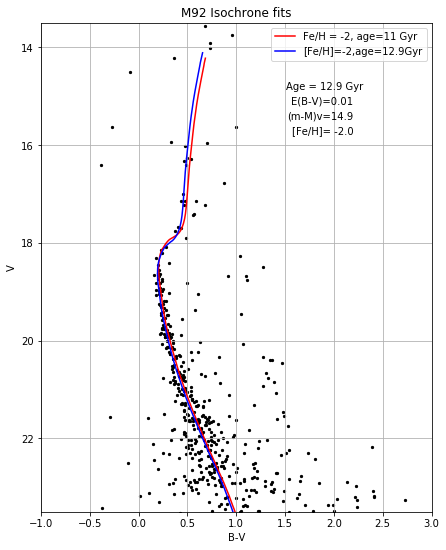

In [107]:
## another candidate is [Fe/H=-2, age = 11 Gyr]
fig, ax = plt.subplots(figsize=(7, 9))

#plt.figure(figsize=(8,7))

plt.xlim([-1, 3])
plt.ylim([23.5,13.5])

plt.plot(BVo_e+0.03,Vo_e+14.9,color='red') 
plt.plot(BVo_m2-0.01,Vo_m2+14.8,color='blue')

plt.scatter(BV,V,s=5,color='k')
plt.xlabel('B-V')
plt.ylabel('V')
plt.title('M92 Isochrone fits')
plt.legend(['Fe/H = -2, age=11 Gyr','[Fe/H]=-2,age=12.9Gyr'])

## very close, 12.9Gyr seems the better fit

plt.grid(True)

ax.annotate('E(B-V)=0.01',xy=(2.2, 15), xycoords='data',
            xytext=(2.2, 15), 
            horizontalalignment='right', verticalalignment='top')
ax.annotate('(m-M)v=14.9',xy=(2.2, 15.3), xycoords='data',
            xytext=(2.2, 15.3), 
            horizontalalignment='right', verticalalignment='top')
ax.annotate('[Fe/H]= -2.0',xy=(2.2, 15.6), xycoords='data',
            xytext=(2.2, 15.6), 
            horizontalalignment='right', verticalalignment='top')
ax.annotate('Age = 12.9 Gyr',xy=(2.3, 14.7), xycoords='data',
            xytext=(2.3, 14.7), 
            horizontalalignment='right', verticalalignment='top')

The isochrone that proved to be the best fit corresponds with an age of 12.9 Gyr and metallicity of -2.0. This is in close agreement with the cluster properties cited in table 1 of [1]: [Fe/H] = -2.29, Radius from galactic center = 9.5 kpc (a value obtained below is 9.4 kpc, although it seems to be an overestimate from the commonly cited value of 8.2 kpc), and E(B-V) value of 0.02.

**[1]** Davidge, T.J., Courteau, S., Herzberg Institute of Astrophysics, National Research Council of Canada, 5071 West Saanich Road, Victoria, Canada. HIGH ANGULAR RESOLUTION JHK IMAGING OF THE CENTERS OF THE METAL-POOR GLOBULAR CLUSTERS NGC 5272 (M3), NGC 6205 (M13), NGC 6287, AND NGC 6341 (M92). *THE ASTRONOMICAL JOURNAL, 117:1297-1312, 1999 March*
https://iopscience.iop.org/article/10.1086/300765/fulltext/980340.text.html

The horizontal shift corresponds to reddening, which was not too great a value in this case, the cluster proved to be quite metal poor (as expected for a cluster this age). 